<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(0_8)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_0.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.8_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,95.589565,58.173330,65.297223,80.820196,3.345632,313.225946,308.980014,4.245932
1,0.0,1.0,74.209138,82.578290,28.203447,83.589763,-1.402345,277.178292,278.836533,-1.658241
2,0.0,2.0,74.440595,77.174084,87.998186,52.173688,1.300679,303.087232,301.350194,1.737038
3,0.0,3.0,59.576364,39.421436,51.066458,90.307151,3.366415,253.737823,248.766584,4.971239
4,0.0,4.0,52.408322,92.697621,74.591867,52.736995,-4.312337,278.122467,282.388520,-4.266053
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,96.698528,48.589961,50.996801,40.158218,7.892777,254.336284,245.594583,8.741700
119996,999.0,116.0,68.877186,68.071497,36.382901,38.584562,0.266790,222.182936,223.216553,-1.033616
119997,999.0,117.0,55.674499,22.480327,42.561396,64.924587,-3.329661,192.311148,195.104949,-2.793801
119998,999.0,118.0,54.467314,86.504460,59.801669,39.587811,12.625590,262.986845,252.247701,10.739144


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    95.589565  58.173330  65.297223  80.820196   3.345632   
      1.0    74.209138  82.578290  28.203447  83.589763  -1.402345   
      2.0    74.440595  77.174084  87.998186  52.173688   1.300679   
      3.0    59.576364  39.421436  51.066458  90.307151   3.366415   
      4.0    52.408322  92.697621  74.591867  52.736995  -4.312337   
...                ...        ...        ...        ...        ...   
999.0 115.0  96.698528  48.589961  50.996801  40.158218   7.892777   
      116.0  68.877186  68.071497  36.382901  38.584562   0.266790   
      117.0  55.674499  22.480327  42.561396  64.924587  -3.329661   
      118.0  54.467314  86.504460  59.801669  39.587811  12.625590   
      119.0  48.300491  78.745786  87.003310  53.635468   2.320307   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    313.225946  308.980014   4.245932  
      1.0    277.178292  278.836533  -1.658241  
      2.0    303.087232  301.350194   1.737038  
      3.0    253.737823  248.766584   4.971239  
      4.0    278.122467  282.388520  -4.266053  
...                 ...         ...        ...  
999.0 115.0  254.336284  245.594583   8.741700  
      116.0  222.182936  223.216553  -1.033616  
      117.0  192.311148  195.104949  -2.793801  
      118.0  262.986845  252.247701  10.739144  
      119.0  280.005362  278.501963   1.503399  

[120000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    95.589565  58.173330  65.297223  80.820196   3.345632   
      1.0    74.209138  82.578290  28.203447  83.589763  -1.402345   
      2.0    74.440595  77.174084  87.998186  52.173688   1.300679   
      3.0    59.576364  39.421436  51.066458  90.307151   3.366415   
      4.0    52.408322  92.697621  74.591867  52.736995  -4.312337   
...                ...        ...        ...        ...        ...   
999.0 115.0  96.698528  48.589961  50.996801  40.158218   7.892777   
      116.0  68.877186  68.071497  36.382901  38.584562   0.266790   
      117.0  55.674499  22.480327  42.561396  64.924587  -3.329661   
      118.0  54.467314  86.504460  59.801669  39.587811  12.625590   
      119.0  48.300491  78.745786  87.003310  53.635468   2.320307   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    313.225946  308.980014   4.245932  
      1.0    277.178292  278.836533  -1.658241  
      2.0    303.087232  301.350194   1.737038  
      3.0    253.737823  248.766584   4.971239  
      4.0    278.122467  282.388520  -4.266053  
...                 ...         ...        ...  
999.0 115.0  254.336284  245.594583   8.741700  
      116.0  222.182936  223.216553  -1.033616  
      117.0  192.311148  195.104949  -2.793801  
      118.0  262.986845  252.247701  10.739144  
      119.0  280.005362  278.501963   1.503399  

[120000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,95.589565,58.173330,65.297223,80.820196,3.345632,313.225946,308.980014,4.245932
1,0.0,1.0,74.209138,82.578290,28.203447,83.589763,-1.402345,277.178292,278.836533,-1.658241
2,0.0,2.0,74.440595,77.174084,87.998186,52.173688,1.300679,303.087232,301.350194,1.737038
3,0.0,3.0,59.576364,39.421436,51.066458,90.307151,3.366415,253.737823,248.766584,4.971239
4,0.0,4.0,52.408322,92.697621,74.591867,52.736995,-4.312337,278.122467,282.388520,-4.266053
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,96.698528,48.589961,50.996801,40.158218,7.892777,254.336284,245.594583,8.741700
119996,999.0,116.0,68.877186,68.071497,36.382901,38.584562,0.266790,222.182936,223.216553,-1.033616
119997,999.0,117.0,55.674499,22.480327,42.561396,64.924587,-3.329661,192.311148,195.104949,-2.793801
119998,999.0,118.0,54.467314,86.504460,59.801669,39.587811,12.625590,262.986845,252.247701,10.739144


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    95.589565  58.173330  65.297223  80.820196   3.345632   
      1.0    74.209138  82.578290  28.203447  83.589763  -1.402345   
      2.0    74.440595  77.174084  87.998186  52.173688   1.300679   
      3.0    59.576364  39.421436  51.066458  90.307151   3.366415   
      4.0    52.408322  92.697621  74.591867  52.736995  -4.312337   
...                ...        ...        ...        ...        ...   
999.0 115.0  96.698528  48.589961  50.996801  40.158218   7.892777   
      116.0  68.877186  68.071497  36.382901  38.584562   0.266790   
      117.0  55.674499  22.480327  42.561396  64.924587  -3.329661   
      118.0  54.467314  86.504460  59.801669  39.587811  12.625590   
      119.0  48.300491  78.745786  87.003310  53.635468   2.320307   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    313.225946  308.980014   4.245932  
      1.0    277.178292  278.836533  -1.658241  
      2.0    303.087232  301.350194   1.737038  
      3.0    253.737823  248.766584   4.971239  
      4.0    278.122467  282.388520  -4.266053  
...                 ...         ...        ...  
999.0 115.0  254.336284  245.594583   8.741700  
      116.0  222.182936  223.216553  -1.033616  
      117.0  192.311148  195.104949  -2.793801  
      118.0  262.986845  252.247701  10.739144  
      119.0  280.005362  278.501963   1.503399  

[120000 rows x 8 columns]

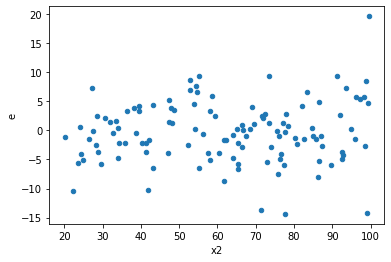

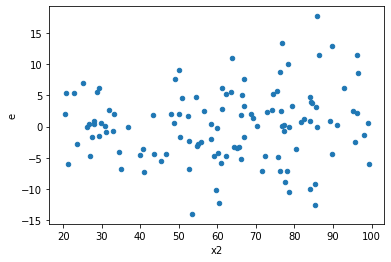

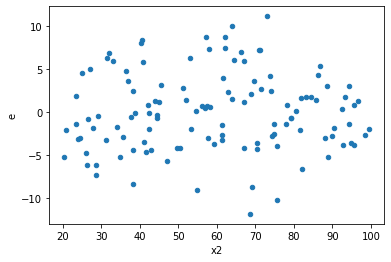

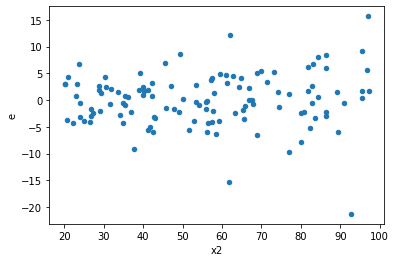

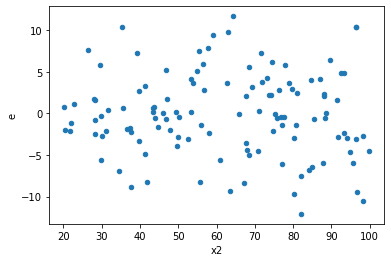

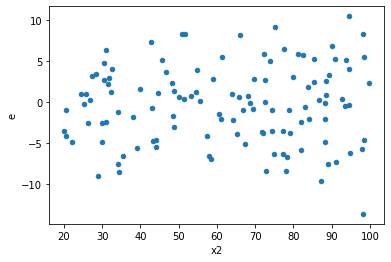

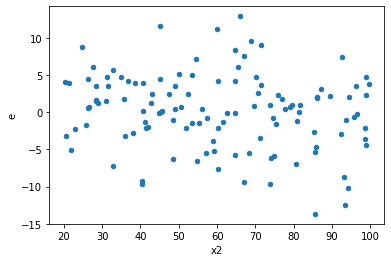

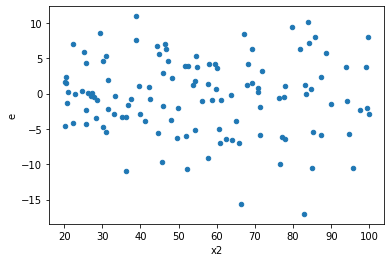

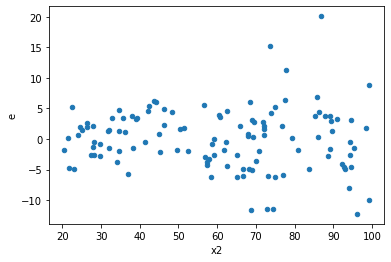

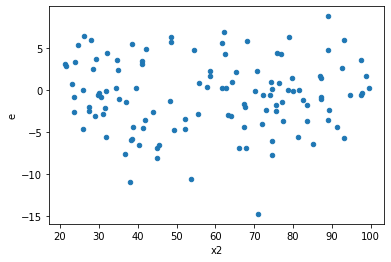

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,52.0,60.0,1376.983759778405,2118.964511387353,26.480456918815484,35.31607518978922,1.3336656273742638,0.2810270508121273,0.8594864745939363,0.14051352540606366,Reject005=1 : Homoscedasticity
4.0,59.0,53.0,1302.573082628586,1459.6325980429594,22.07750987506078,27.540237698923764,1.247434056412032,0.4149954023539135,0.7925022988230432,0.20749770117695676,Reject005=1 : Homoscedasticity
5.0,56.0,56.0,982.2741876318709,1499.712501526731,17.540610493426264,26.780580384405912,1.526775843659634,0.1163068930438953,0.9418465534780524,0.05815344652194765,Reject005=1 : Homoscedasticity
6.0,65.0,47.0,1347.9300302525198,1412.4714497658003,20.737385080807996,30.05258403757022,1.4491983401216404,0.18272597832595117,0.9086370108370244,0.09136298916297558,Reject005=1 : Homoscedasticity
8.0,74.0,38.0,1224.1845422952786,1538.292276018955,16.543034355341604,40.48137568470934,2.447034492897505,0.0032446164760935314,0.9983776917619532,0.0016223082380467657,Reject005=0 : Heteroscedasticity
10.0,52.0,60.0,1238.2110212965824,1894.9448029310201,23.811750409549663,31.58241338218367,1.3263373266972258,0.2902800230783491,0.8548599884608254,0.14514001153917455,Reject005=1 : Homoscedasticity
11.0,59.0,53.0,1037.2439791909917,1238.0305095000626,17.58040642696596,23.359066216982313,1.3286988736024141,0.29467842737705374,0.8526607863114731,0.14733921368852687,Reject005=1 : Homoscedasticity
13.0,54.0,58.0,831.4242102129868,1445.448643515004,15.39674463357383,24.921528336465588,1.618623217411959,0.0730593412173588,0.9634703293913206,0.0365296706086794,Reject005=1 : Homoscedasticity
15.0,46.0,66.0,1369.1434624201288,2203.642232462179,29.76398831348106,33.38851867366938,1.1217756949107072,0.6608910615749659,0.669554469212517,0.33044553078748296,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,81.0,31.0,2310.1427147550908,580.1156969451465,28.520280429075196,18.713409578875694,0.6561439543139338,0.136451027813339,Reject005=1 : Homoscedasticity
1.0,52.0,60.0,1376.983759778405,2118.964511387353,26.480456918815484,35.31607518978922,1.3336656273742638,0.2810270508121273,Reject005=1 : Homoscedasticity
2.0,56.0,56.0,1332.674360582019,1017.5377556468078,23.797756438964626,18.17031706512157,0.7635306761678963,0.3156201407889092,Reject005=1 : Homoscedasticity
3.0,61.0,51.0,1748.5207624825616,878.1541650062268,28.664274794796093,17.21870911776915,0.6007027647144645,0.05703681293397608,Reject005=1 : Homoscedasticity
4.0,59.0,53.0,1302.573082628586,1459.6325980429594,22.07750987506078,27.540237698923764,1.247434056412032,0.4149954023539135,Reject005=1 : Homoscedasticity
5.0,56.0,56.0,982.2741876318709,1499.712501526731,17.540610493426264,26.780580384405912,1.526775843659634,0.1163068930438953,Reject005=1 : Homoscedasticity
6.0,65.0,47.0,1347.9300302525198,1412.4714497658003,20.737385080807996,30.05258403757022,1.4491983401216404,0.18272597832595117,Reject005=1 : Homoscedasticity
7.0,62.0,50.0,1939.4798809200138,1323.7613582746933,31.28193356322603,26.475227165493866,0.8463424139682093,0.5293712628051815,Reject005=1 : Homoscedasticity
8.0,74.0,38.0,1224.1845422952786,1538.292276018955,16.543034355341604,40.48137568470934,2.447034492897505,0.0032446164760935314,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      825
Reject005=0 : Heteroscedasticity    175
Name: Result_test, dtype: int64